In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [3]:
print("Duplicate values:\n", df.duplicated().sum())

Duplicate values:
 107


In [4]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (784, 15)


In [5]:
num_cols = df.select_dtypes(include='number')

C:\Users\ishaa\AppData\Local\Temp\ipykernel_12816\3768808092.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(num_cols.dropna().values, labels=num_cols.columns)


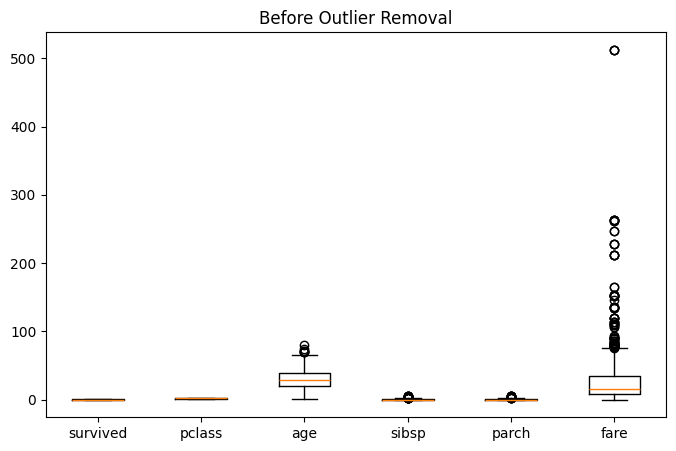

Rows before removal: 784


In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(num_cols.dropna().values, labels=num_cols.columns)
plt.title("Before Outlier Removal")
plt.show()

print("Rows before removal:", num_cols.shape[0])

In [7]:
# IQR Method

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Count outliers per row
outlier_count = ((num_cols < lower) | (num_cols > upper)).sum(axis=1)

df = df[outlier_count < 2]


C:\Users\ishaa\AppData\Local\Temp\ipykernel_12816\3930861505.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(num_cols.dropna().values, labels=num_cols.columns)


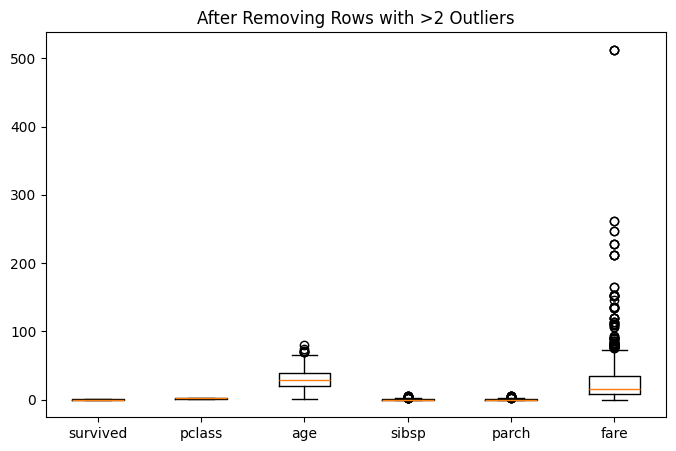

Rows after removal: 780


In [8]:
num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(8,5))
plt.boxplot(num_cols.dropna().values, labels=num_cols.columns)
plt.title("After Removing Rows with >2 Outliers")
plt.show()

print("Rows after removal:", num_cols.shape[0])


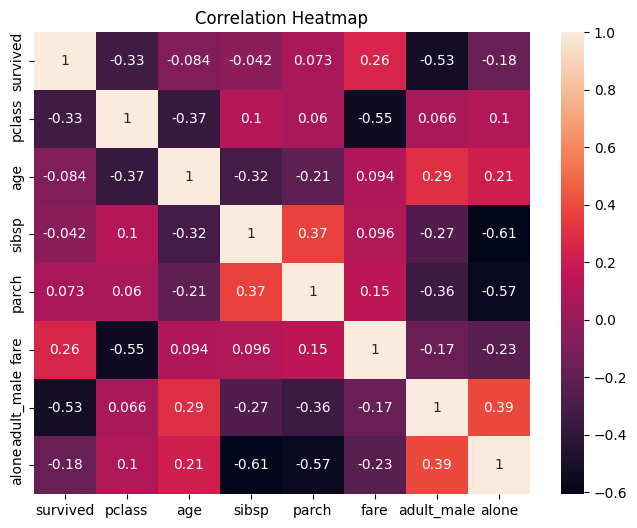

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
corr = df.corr(numeric_only=True)

corr_pairs = corr.unstack()
corr_pairs
corr_pairs = corr_pairs[corr_pairs != 1]

print("Most positive correlation:", corr_pairs.idxmax())
print("Most negative correlation:", corr_pairs.idxmin())

Most positive correlation: ('adult_male', 'alone')
Most negative correlation: ('sibsp', 'alone')


In [11]:
under_30 = df[df["age"] < 30]

print("Total passengers with age < 30:", under_30.shape[0])

Total passengers with age < 30: 357


In [12]:
first_class_fare = df[df["pclass"] == 1]["fare"].sum()

print("Total fare paid by first class passengers:", first_class_fare)

Total fare paid by first class passengers: 17028.3917


In [13]:
survivors = df[df["survived"] == 1]

survivor_count = survivors.groupby("pclass")["survived"].count()

print("Number of survivors in each class:\n")
print(survivor_count)

Number of survivors in each class:

pclass
1    133
2     84
3    104
Name: survived, dtype: int64
